In [1]:
import numpy as np
from sklearn import cross_validation
from matplotlib import pyplot as plt
import csv


C:\Users\AngZhou\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Step 1. Loading DataSet and Labels
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Read data file into DataFrame
train_df = pd.read_csv("C:/Users/AngZhou/Desktop/Cornell_Course/AML/HW/HW1/All_data_set_Titanic/train.csv")
test_df = pd.read_csv("C:/Users/AngZhou/Desktop/Cornell_Course/AML/HW/HW1/All_data_set_Titanic/test.csv")

In [4]:
# Have a look what the dataset and data type looks like.

In [5]:
# preview train data
print '# of observations in the train data is', train_df.shape[0]
train_copy_df=train_df.copy()
train_copy_df.head()

# of observations in the train data is 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# preview test data
print '# of observations in the test data is', test_df.shape[0]
test_copy_df=test_df.copy()
test_copy_df.head()

# of observations in the test data is 418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Conlcusion: We can see that some data value is not number. There strings and empty values. 
#             We need to clean the data in order to do the analysis and train the model.

In [8]:
# Step 2: clean dataset
# a) See how many missing data for each fields
train_copy_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# We saw that there are missing data in fields "Age", "Cabin", "Embarked".

In [10]:
# b) want to know the percentage of missing data in each field:
# 1) Age:
print 'Percent of missing "Age" records is', ((train_copy_df['Age'].isnull().sum()/float(train_copy_df.shape[0])*100)), "%"
# 2) Cabin:
print 'Percent of missing "Cabin" records is', ((train_copy_df['Cabin'].isnull().sum()/float(train_copy_df.shape[0])*100)), "%"
# 3) Embarked:
print 'Percent of missing "Embarked" records is', ((train_copy_df['Embarked'].isnull().sum()/float(train_copy_df.shape[0])*100)), "%"

Percent of missing "Age" records is 19.865319865319865 %
Percent of missing "Cabin" records is 77.10437710437711 %
Percent of missing "Embarked" records is 0.22446689113355783 %


In [11]:
# c) Decide dealing with missing data

In [12]:
# 1) Decide to delete the Carbin feature since too many missing data. (do it later)

C:\Users\AngZhou\Anaconda3\envs\py27\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


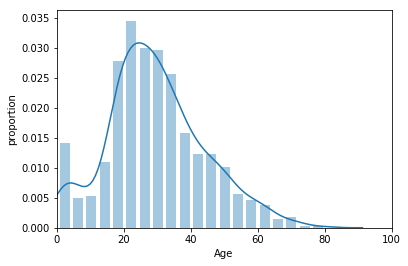

In [13]:
# 2) print the relationship between survive rate and age:
import seaborn as sns, numpy as np
ax = sns.distplot(train_df["Age"].dropna(),bins=20,hist_kws={"rwidth":0.75})
ax.set(xlabel='Age')
ax.set(ylabel='proportion')
plt.xlim(0,100)
plt.show()

In [14]:
# The curve is a little right skewed, so fill the empty data with median, since the mode and mean might 
# largely affect the general distribution.(do it later)

In [15]:
age_median=train_df["Age"].median()
print age_median

28.0


S    644
C    168
Q     77
Name: Embarked, dtype: int64


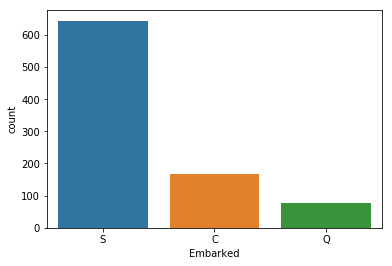

In [16]:
# 3) print the relationship between survive rate and Embarked:
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_copy_df)
plt.show()

In [17]:
# The most frequent class is "S". So fill the empty data with class "S" (do it later)

In [18]:
embarked_mode=train_copy_df['Embarked'].mode().iloc[0]
print embarked_mode

S


In [19]:
# d) clean the data(drop the Carbin feature, filling missing age with median, filling missing Embarked with "S"):
# 1) drop the Cabin field
train_copy_df.drop('Cabin', axis=1, inplace=True)
# 2) fill the empty age data with median:
train_copy_df["Age"].fillna(age_median, inplace=True)
# 3) fill the empty Embarked data with mode:
train_copy_df["Embarked"].fillna(embarked_mode, inplace=True)

In [20]:
# check if there is no empty data anymore
train_copy_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
# Since the meaning of SibSp and Parch is similar that they are all close/friend/family relationships
# Decided to combine these two variables and make new variables of isAlone, since
# whether a passenger isAlone when boarding is more meaningful.
train_copy_df['isAlone']=np.where((train_copy_df["SibSp"]+train_copy_df["Parch"])>0, 0, 1)
train_copy_df.drop('SibSp', axis=1, inplace=True)
train_copy_df.drop('Parch', axis=1, inplace=True)

In [22]:
# Convert other categorical variables into 1/0 dummy variables
# CAteorical variables that need to be converted are: 'Pclass','Embarked', and 'Sex'.
# Drop Name, PassengerId, and Ticket which supposed to have no meaning towards suvive rate
train_copy_df=pd.get_dummies(train_copy_df, columns=['Pclass','Embarked','Sex'])
train_copy_df.drop('Sex_female', axis=1, inplace=True) # only need (#categories-1)=1 dummy variables
train_copy_df.drop('Embarked_Q', axis=1, inplace=True) # only need (#categories-1)=2 dummy variables
train_copy_df.drop('Pclass_2', axis=1, inplace=True) # only need (#categories-1)=2 dummy variables
train_copy_df.drop('PassengerId', axis=1, inplace=True)
train_copy_df.drop('Name', axis=1, inplace=True)
train_copy_df.drop('Ticket', axis=1, inplace=True)

In [23]:
# The training dataset should be cleaned.
final_train = train_copy_df
final_train.head()

,Survived,Age,Fare,isAlone,Pclass_1,Pclass_3,Embarked_C,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,1,0,1,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,1,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1


In [24]:
# Apply same strategies to test data:
# Check the missing data:
test_copy_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
# Get the media of Age data.
test_age_median=test_df["Age"].median()
print test_age_median

27.0


In [26]:
# Get the mode of the Fare data
test_fare_mode=train_copy_df['Fare'].mode().iloc[0]
print test_fare_mode

8.05


In [27]:
# 1) drop the Cabin field
test_copy_df.drop('Cabin', axis=1, inplace=True)
# 2) fill the empty age data with median:
test_copy_df["Age"].fillna(test_age_median, inplace=True)
# 3) fill the empty Embarked data with mode:
test_copy_df["Fare"].fillna(test_fare_mode, inplace=True)

In [28]:
test_copy_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
# Since the meaning of SibSp and Parch is similar that they are all close/friend/family relationships
# Decided to combine these two variables and make new variables of isAlone
test_copy_df['isAlone']=np.where((test_copy_df["SibSp"]+test_copy_df["Parch"])>0, 0, 1)
test_copy_df.drop('SibSp', axis=1, inplace=True)
test_copy_df.drop('Parch', axis=1, inplace=True)
# Convert other categorical variables into 1/0
# drop Name, PassengerId, and Ticket which supposed to have no meaning towards suvive rate
test_copy_df=pd.get_dummies(test_copy_df, columns=["Pclass","Embarked","Sex"])
test_copy_df.drop('Sex_female', axis=1, inplace=True) # only need (#categories-1)=1 dummy variables
test_copy_df.drop('Embarked_Q', axis=1, inplace=True) # only need (#categories-1)=2 dummy variables
test_copy_df.drop('Pclass_2', axis=1, inplace=True) # only need (#categories-1)=2 dummy variables
test_copy_df.drop('PassengerId', axis=1, inplace=True)
test_copy_df.drop('Name', axis=1, inplace=True)
test_copy_df.drop('Ticket', axis=1, inplace=True)

In [30]:
# Test Data should be cleaned
final_test = test_copy_df
final_test.head()

,Age,Fare,isAlone,Pclass_1,Pclass_3,Embarked_C,Embarked_S,Sex_male
0,34.5,7.8292,1,0,1,0,0,1
1,47.0,7.0000,0,0,1,0,1,0
2,62.0,9.6875,1,0,0,0,0,1
3,27.0,8.6625,1,0,1,0,1,1
4,22.0,12.2875,0,0,1,0,1,0


In [31]:
# Data cleaning finished

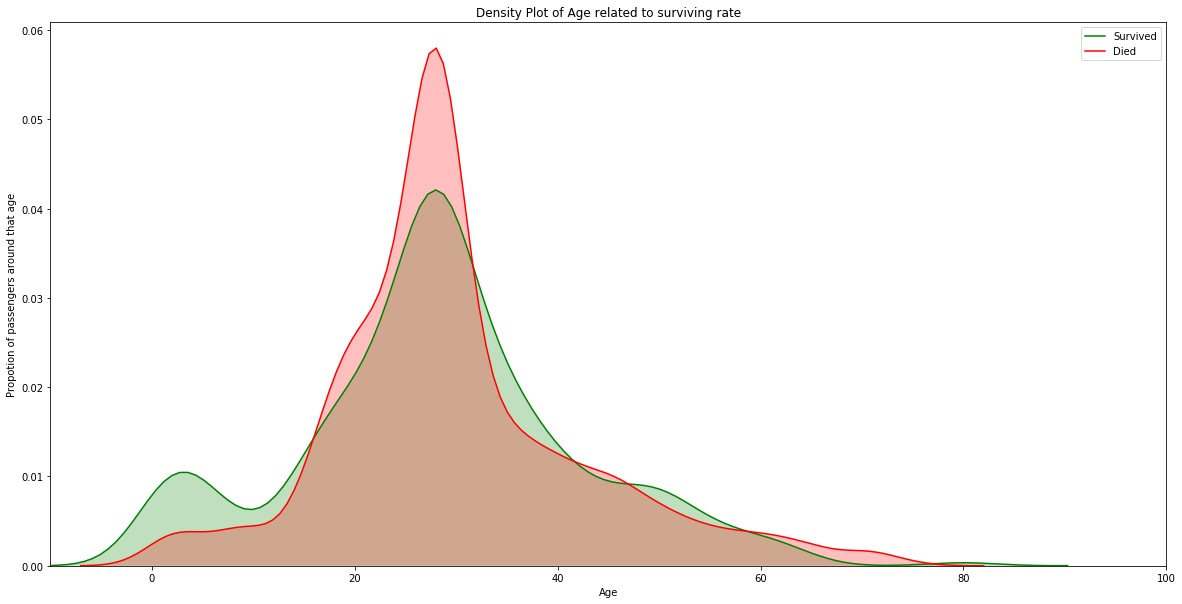

In [32]:
# Step 3: analyze all fields and finalize variables
# 1) print the relationship between survive rate and age:
plt.figure(figsize=(20,10))

ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="green", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="red", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age related to surviving rate')
ax.set(xlabel='Age')
ax.set(ylabel='Propotion of passengers around that age')
plt.xlim(-10,100)
plt.show()

In [33]:
# The passenger who's age is lower than 17 is more likely to survive compare to peers.

In [34]:
# Split the 'Age' to 'isYoung' variables. Which 0 represent is young, 1 represent is not young.
final_train['young']=np.where(final_train['Age']>=17, 0, 1)
final_test['young']=np.where(final_test['Age']>=17, 0, 1)

In [35]:
final_train.head()

,Survived,Age,Fare,isAlone,Pclass_1,Pclass_3,Embarked_C,Embarked_S,Sex_male,young
0,0,22.0,7.2500,0,0,1,0,1,1,0
1,1,38.0,71.2833,0,1,0,1,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,1,0,0
4,0,35.0,8.0500,1,0,1,0,1,1,0


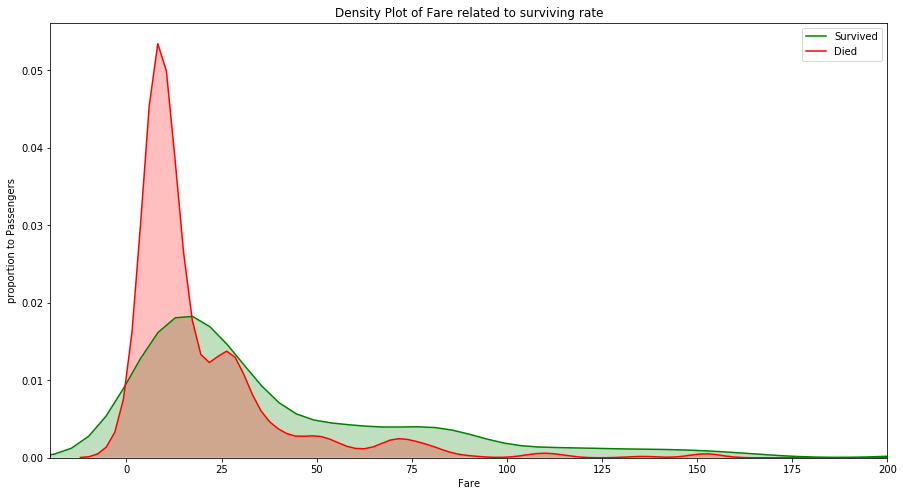

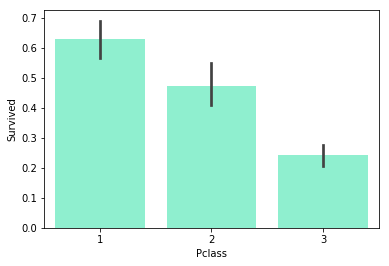

In [36]:
# analyze the Fare and Passenger class, since they might be correlated according to our intuition
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="green", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="red", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare related to surviving rate')
ax.set(xlabel='Fare')
ax.set(ylabel='proportion to Passengers')
plt.xlim(-20,200)
plt.show()
sns.barplot('Pclass', 'Survived', data=train_df, color="aquamarine")
plt.show()

In [37]:
# It looks like the higher class passengers and high fare passengers tend to survive but low class passenger and low fare
# passengers tend to be dead.

In [38]:
# Decided to split Fare into dummy variables.
# Looks like passenger who's fare is less than 15 tend to have less surviving rate. 
final_train['cheap']=np.where(final_train['Fare']>=15, 0, 1)
final_test['cheap']=np.where(final_test['Fare']>=15, 0, 1)

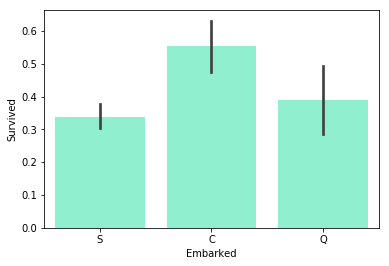

In [39]:
# Analyze the Embarked
sns.barplot('Embarked', 'Survived', data=train_df, color="aquamarine")
plt.show()

In [40]:
# Looks like Embarked from "C" has a larger surviving rate.

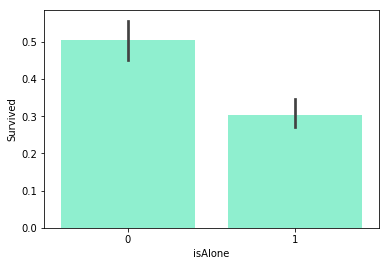

In [41]:
sns.barplot('isAlone', 'Survived', data=final_train, color="aquamarine")
plt.show()

In [42]:
# Looks like the passenger who is alone tend to have less survival rate,
# and passenger who is not alone tend to have larger survival rate.

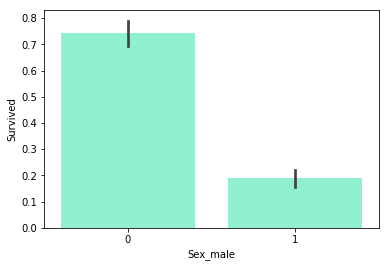

In [43]:
# Analyse the sex related to surviving rate
sns.barplot('Sex_male', 'Survived', data=final_train, color="aquamarine")
plt.show()

In [44]:
# Sex variable has a significant effect on surviving rate.(1: male, 0: female)
# Looks like female tend to have higher surviving rate. Male tend to have lower surviving rate.

In [45]:
train_copy_df.drop('Age', axis=1, inplace=True)
train_copy_df.drop('Fare', axis=1, inplace=True)
test_copy_df.drop('Age', axis=1, inplace=True)
test_copy_df.drop('Fare', axis=1, inplace=True)

In [46]:
final_train.head()

,Survived,isAlone,Pclass_1,Pclass_3,Embarked_C,Embarked_S,Sex_male,young,cheap
0,0,0,0,1,0,1,1,0,1
1,1,0,1,0,1,0,0,0,0
2,1,1,0,1,0,1,0,0,1
3,1,0,1,0,0,1,0,0,0
4,0,1,0,1,0,1,1,0,1


In [47]:
final_test.head()

,isAlone,Pclass_1,Pclass_3,Embarked_C,Embarked_S,Sex_male,young,cheap
0,1,0,1,0,0,1,0,1
1,0,0,1,0,1,0,0,1
2,1,0,0,0,0,1,0,1
3,1,0,1,0,1,1,0,1
4,0,0,1,0,1,0,0,1


Optimal number of features: 5
Selected features: ['Pclass_1', 'Pclass_3', 'Embarked_S', 'Sex_male', 'young']


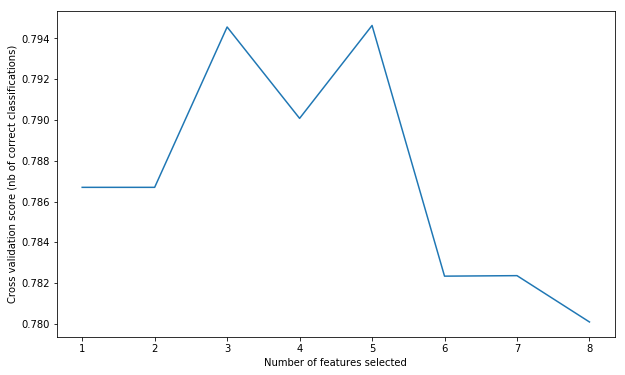

In [48]:
# Step 4: Selecting features
# use Recursive feature elimination with cross-validation (#fold=10) to select variables
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

cols = ["isAlone","Pclass_1","Pclass_3","Embarked_C","Embarked_S","Sex_male","young","cheap"] 
X = final_train[cols]
y = final_train['Survived']

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [49]:
# AS we can see from the output 
# Optimal number of features is 5, and selected features are 'Pclass_1', 'Pclass_3', 'Embarked_S', 'Sex_male', 'young'.

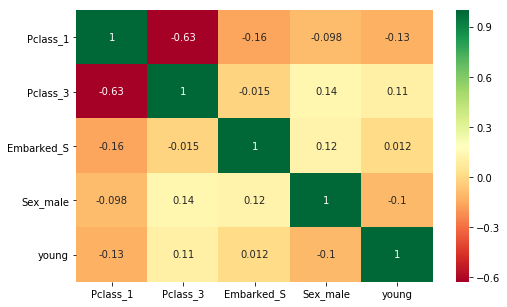

In [50]:
# Have a look at the correlation between out selected features
Selected_features = ['Pclass_1', 'Pclass_3', 'Embarked_S', 'Sex_male', 'young']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [51]:
# We can see that none of the absolute value of correlation is larger than 0.75. (except on the diagnal)
# Which is good.

In [52]:
# Train the logistic regression model
optimal_features = ['Pclass_1', 'Pclass_3', 'Embarked_S', 'Sex_male', 'young']
X_optimal = final_train[optimal_features]
y = train_copy_df[['Survived']]
logreg = LogisticRegression()

logreg.fit(X_optimal, y)

C:\Users\AngZhou\Anaconda3\envs\py27\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
# Apply the logistic model on the testing data set and get the prediction labels
y_test_pred = logreg.predict(final_test[optimal_features])

In [54]:
# Output the solution
import csv

file_name = "submission.csv"
with open(file_name, mode='wb') as submission_file:
    fieldnames = ['PassengerId', 'Survived']
    writer = csv.DictWriter(submission_file, fieldnames=fieldnames)

    writer.writerow({'PassengerId': 'PassengerId', 'Survived': 'Survived'})
    for i in range(len(y_test_pred)):
        writer.writerow({'PassengerId': test_df['PassengerId'][i], 'Survived': y_test_pred[i]})
print "done"

done
